In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# plt.style.use('seaborn')
# sns.set_palette('husl')

crime_df = pd.read_csv('../data/crime_district.csv')
income_df = pd.read_csv('../data/hh_income_state.csv')
poverty_df = pd.read_csv('../data/hh_poverty_state.csv')
labor_df = pd.read_csv('../data/lfs_state_sex.csv')

crime_df = crime_df[(crime_df['district'] != 'All') & (crime_df['state'] != 'Malaysia') & (crime_df['type'] != 'all')]

for df in [crime_df, income_df, labor_df, poverty_df] :
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

## Calculate total crimes by district

Top 10 Districts with Highest Crime Rates:
state              district           
Selangor           Petaling Jaya          23078
W.P. Kuala Lumpur  Dang Wangi             19980
Selangor           Kajang                 19250
                   Gombak                 19058
W.P. Kuala Lumpur  Sentul                 16456
Johor              Johor Bahru Selatan    16022
Selangor           Ampang Jaya            15693
W.P. Kuala Lumpur  Wangsa Maju            14965
Selangor           Klang Selatan          13850
Melaka             Melaka Tengah          13765
Name: crimes, dtype: int64


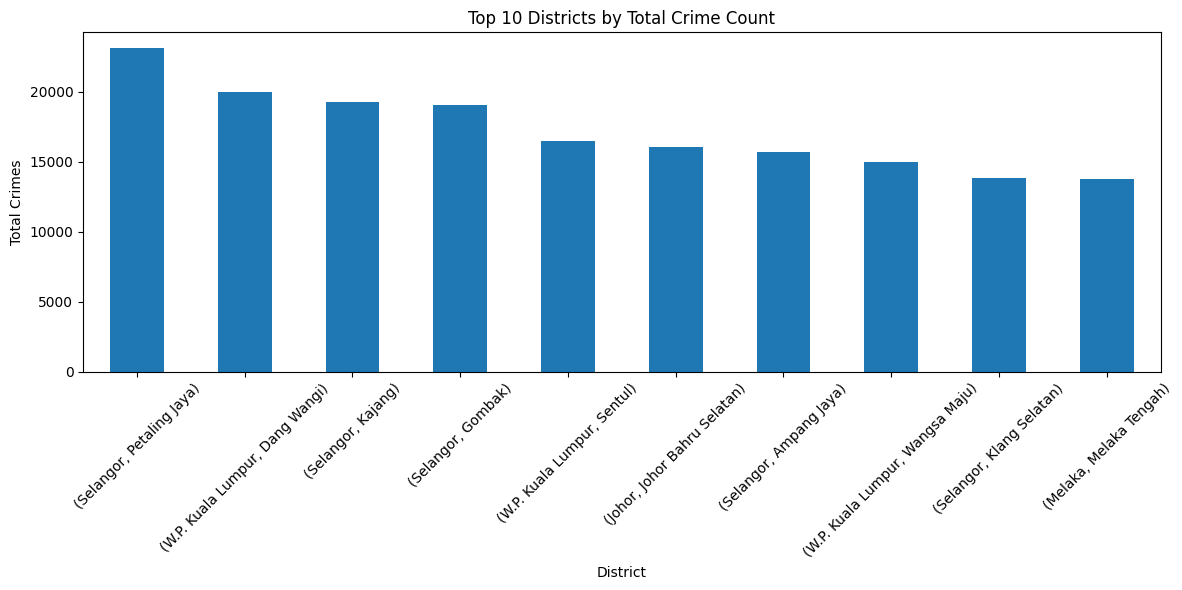

In [27]:
district_crimes = crime_df.groupby(['state', 'district'])['crimes'].sum().sort_values(ascending=False)
print("Top 10 Districts with Highest Crime Rates:")
print(district_crimes.head(10))


plt.figure(figsize=(12, 6))
district_crimes.head(10).plot(kind='bar')
plt.title('Top 10 Districts by Total Crime Count')
plt.xlabel('District')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Crime Type Distribution by District (First 5 District)
type                       break_in  causing_injury  murder  rape  \
state district                                                      
Johor Batu Pahat                864             255      22   160   
      Iskandar Puteri           540             279      20    67   
      Johor Bahru Selatan      2003             831      81   201   
      Johor Bahru Utara        1379             720      32   151   
      Kluang                    408             352      20   147   

type                       robbery_gang_armed  robbery_gang_unarmed  \
state district                                                        
Johor Batu Pahat                            1                   235   
      Iskandar Puteri                       1                   350   
      Johor Bahru Selatan                   6                  1684   
      Johor Bahru Utara                     2                  1019   
      Kluang                      

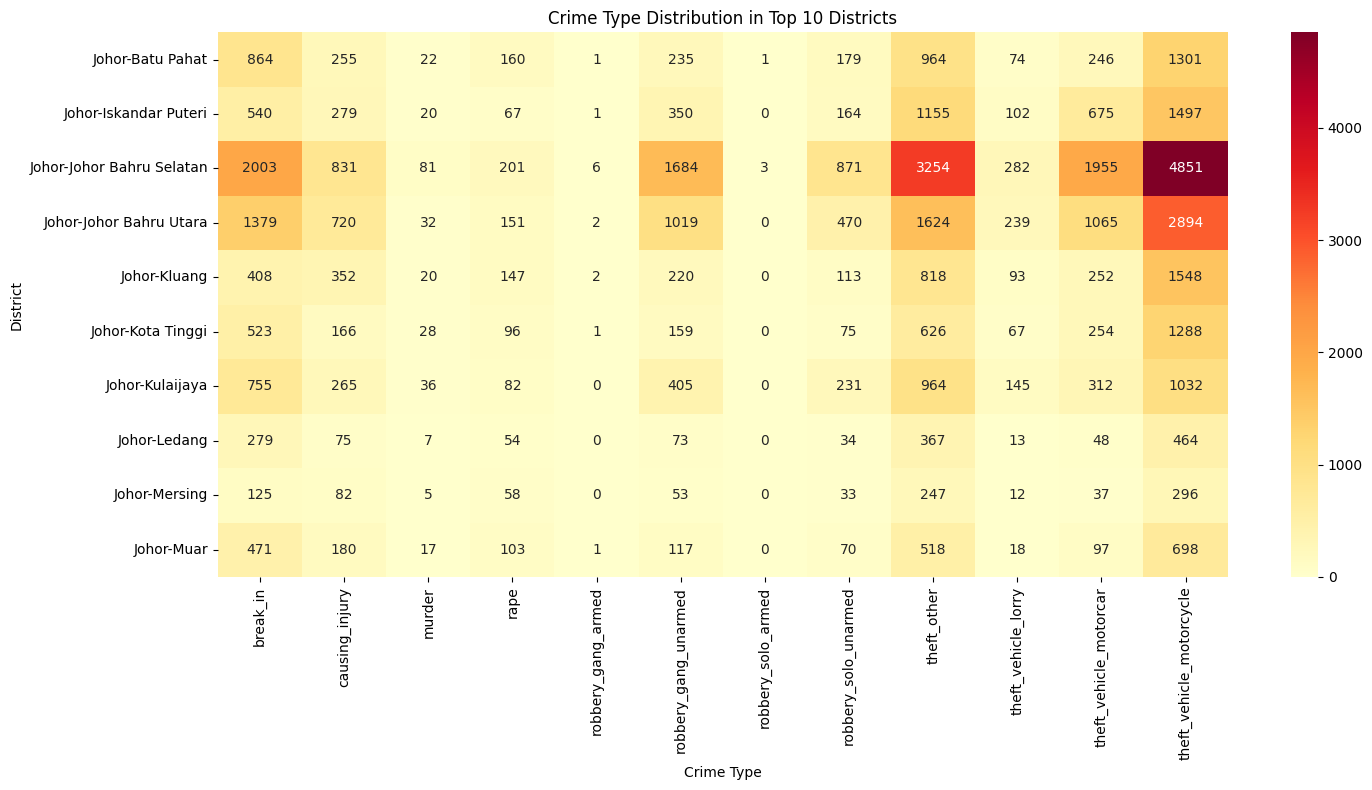

In [28]:
crime_types_district = crime_df.pivot_table(
    index=['state', 'district'],
    columns='type',
    values='crimes',
    aggfunc='sum'
).fillna(0)

print("\nCrime Type Distribution by District (First 5 District)")
print(crime_types_district.head())

# Crime Type Distribution Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(crime_types_district.head(10), annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Crime Type Distribution in Top 10 Districts')
plt.xlabel('Crime Type')
plt.ylabel('District')
plt.tight_layout()
plt.show()

### Analyze income and poverty relationship


State-level Socioeconomic Metrics:
                   avg_income  avg_poverty  unemployment_rate
state                                                        
Johor                 3301.19         8.05               3.36
Kedah                 2235.86        19.66               3.98
Kelantan              1952.67        23.76               4.04
Melaka                3175.95         9.10               2.70
Negeri Sembilan       2886.19         9.50               3.73
Pahang                2417.43        10.18               3.45
Perak                 2369.81        13.16               4.31
Perlis                2221.81        19.08               4.03
Pulau Pinang          3442.05         7.79               2.69
Sabah                 2851.58        23.45               6.15
Sarawak               2975.95        14.98               5.23
Selangor              4731.71         5.51               2.98
Terengganu            2495.86        21.16               4.85
W.P. Kuala Lumpur     6179.61     

C:\Users\C00484\AppData\Local\Temp\ipykernel_33496\3970928735.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(state, (state_metrics['avg_income'][i], state_metrics['avg_poverty'][i]))


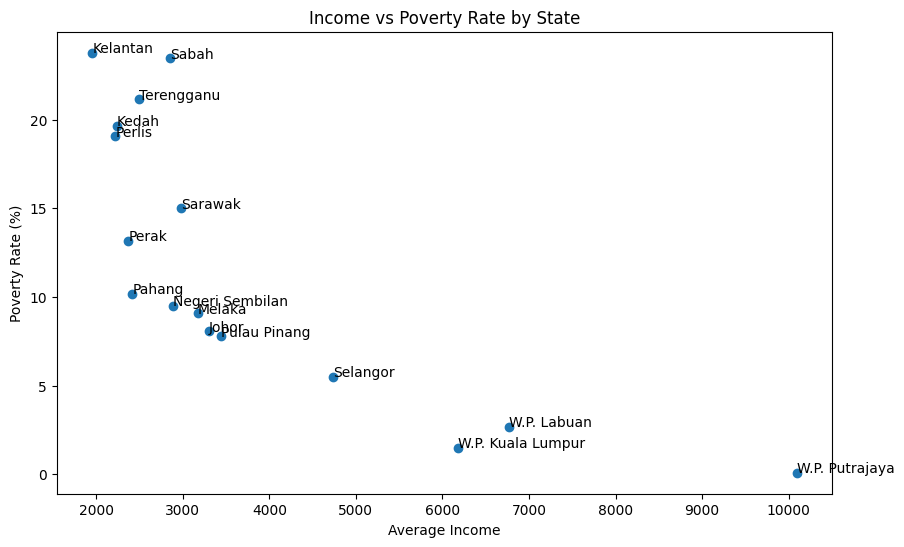

In [29]:
state_metrics = pd.DataFrame()
state_metrics['avg_income'] = income_df.groupby('state')['income_mean'].mean()
state_metrics['avg_poverty'] = poverty_df.groupby('state')['poverty_absolute'].mean()
state_metrics['unemployment_rate'] = labor_df.groupby('state')['u_rate'].mean()



print("\nState-level Socioeconomic Metrics:")
print(state_metrics.round(2))

plt.figure(figsize=(10, 6))
plt.scatter(state_metrics['avg_income'], state_metrics['avg_poverty'])
for i, state in enumerate(state_metrics.index):
    plt.annotate(state, (state_metrics['avg_income'][i], state_metrics['avg_poverty'][i]))
plt.title('Income vs Poverty Rate by State')
plt.xlabel('Average Income')
plt.ylabel('Poverty Rate (%)')
plt.show()



Correlations between socioeconomic factors:
                   avg_income  avg_poverty  unemployment_rate
avg_income               1.00        -0.77              -0.45
avg_poverty             -0.77         1.00               0.60
unemployment_rate       -0.45         0.60               1.00


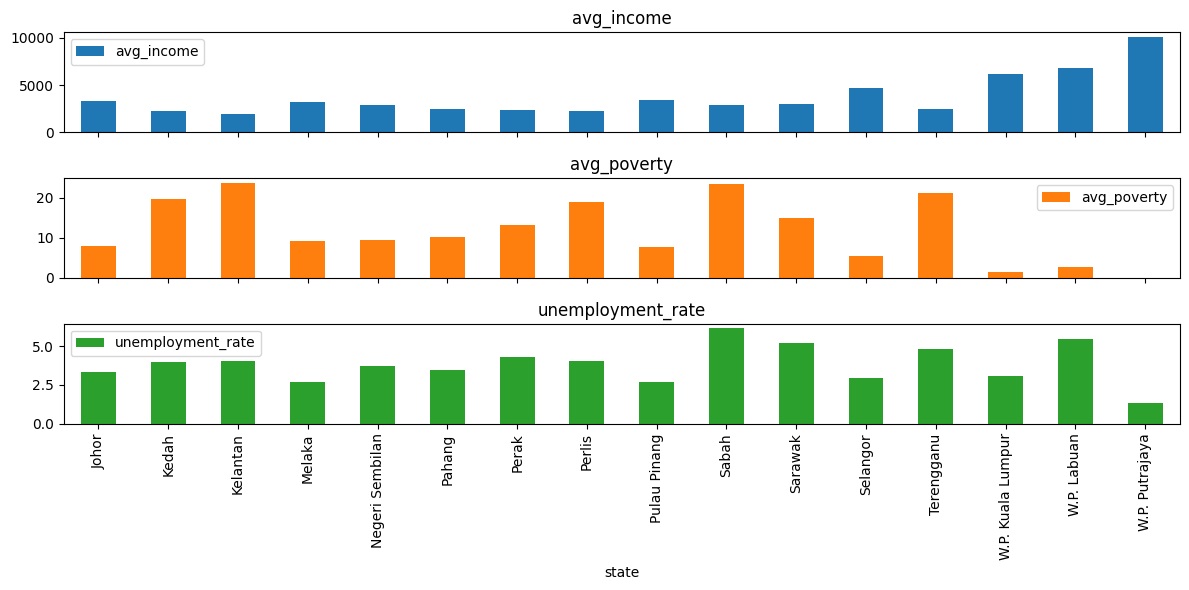

In [30]:
# Calculate correlations between metrics
print("\nCorrelations between socioeconomic factors:")
print(state_metrics.corr().round(2))

state_metrics.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(3,1))
plt.tight_layout()
plt.show()


Yearly Trends:
      total_crimes  avg_income  poverty_rate  unemployment
year                                                      
2016        112355     6756.00          0.33          3.42
2017         99170         NaN           NaN          3.46
2018         88662         NaN           NaN          3.34
2019         83456     7573.81          5.64          3.22
2020         65623     6843.75          8.97          4.20
2021         52974         NaN           NaN          4.31
2022         50813     7902.56          6.09          3.69
2023         52444         NaN           NaN           NaN

Year-over-year changes (%):
      total_crimes  avg_income  poverty_rate  unemployment
year                                                      
2016           NaN         NaN           NaN           NaN
2017        -11.74        0.00          0.00          1.10
2018        -10.60        0.00          0.00         -3.50
2019         -5.87       12.10       1601.89         -3.31
2020       

C:\Users\C00484\AppData\Local\Temp\ipykernel_33496\220031555.py:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  yearly_changes = yearly_metrics.pct_change() * 100


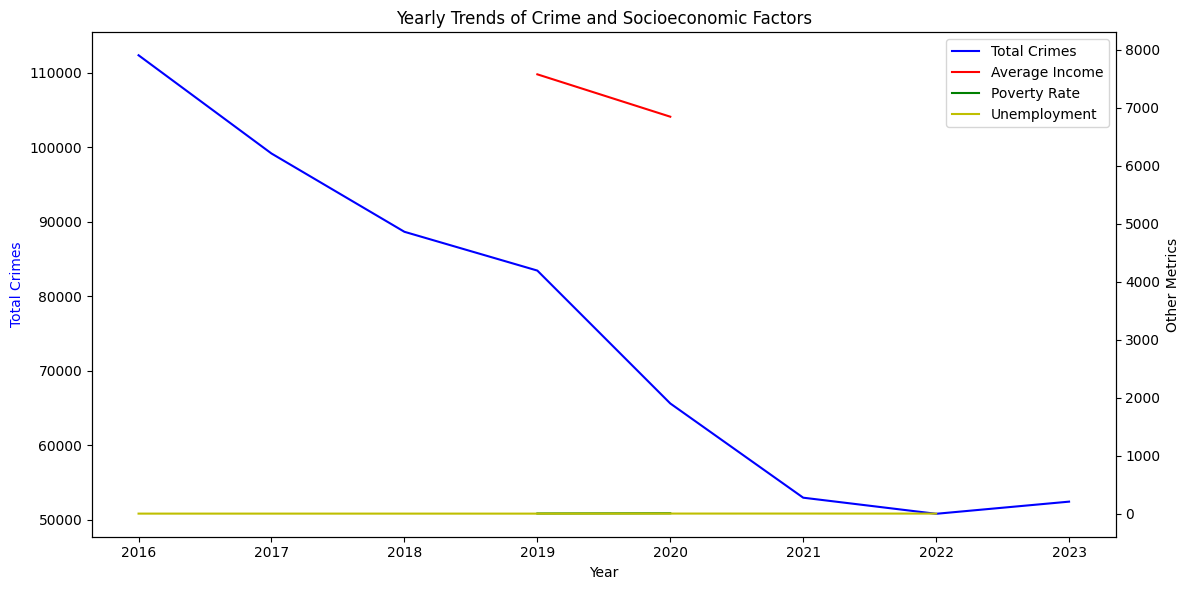

In [32]:
# Yearly trends
yearly_metrics = pd.DataFrame()
yearly_metrics['total_crimes'] = crime_df.groupby('year')['crimes'].sum()
yearly_metrics['avg_income'] = income_df.groupby('year')['income_mean'].mean()
yearly_metrics['poverty_rate'] = poverty_df.groupby('year')['poverty_absolute'].mean()
yearly_metrics['unemployment'] = labor_df.groupby('year')['u_rate'].mean()

print("\nYearly Trends:")
print(yearly_metrics.round(2))

# Calculate year-over-year changes
yearly_changes = yearly_metrics.pct_change() * 100
print("\nYear-over-year changes (%):")
print(yearly_changes.round(2))



# Multi-line plot for yearly trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total crimes
ax1.plot(yearly_metrics.index, yearly_metrics['total_crimes'], 'b-', label='Total Crimes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Crimes', color='b')

# Create second y-axis for other metrics
ax2 = ax1.twinx()
ax2.plot(yearly_metrics.index, yearly_metrics['avg_income'], 'r-', label='Average Income')
ax2.plot(yearly_metrics.index, yearly_metrics['poverty_rate'], 'g-', label='Poverty Rate')
ax2.plot(yearly_metrics.index, yearly_metrics['unemployment'], 'y-', label='Unemployment')
ax2.set_ylabel('Other Metrics')

plt.title('Yearly Trends of Crime and Socioeconomic Factors')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()